<a href="https://colab.research.google.com/github/zhaozhijie1997/web/blob/master/Copy_of_EE4305_Exercise_1A_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Allocation

Enter your matric number and run the following cell (shift + enter) to check project allocated

In [52]:
matric_number = "A0150102H" #@param {type:"string"}

try:
    idx = int(list(filter(str.isdigit, matric_number))[-1])%2

    if idx == 0:
        print('Matric Number:', matric_number)
        print('Project      : 1A-Classification')
        print('https://colab.research.google.com/drive/1v-LiHThlLFF7bm8n64nh8lieAM2jA7lz?usp=sharing')
    elif idx == 1: 
        print('Matric Number: ', matric_number)
        print('Project      : 1B-Regression')
        print('https://colab.research.google.com/drive/1Psi1UXp53t3_fMj8t0uIu4rubbV2wRCl?usp=sharing')

except IndexError:
    print("Please enter valid matric number and try again")

Matric Number: A0150102H
Project      : 1A-Classification
https://colab.research.google.com/drive/1v-LiHThlLFF7bm8n64nh8lieAM2jA7lz?usp=sharing


### Introduction

**EE4305 (2020): Exercise 1A: Classification using MNIST dataset**

---
In this exercise you will learn basics of implementing an ANN-based classification model using TensorFlow and Keras libraries in Python. Following are the learning outcomes of this exercise:

*   Ability to implement a neural network based classification model in Keras
*   Train and predict using the model
*   Evaluate model performance
*   Understand the effect of various model parameters
*   Propose means to improve model performance
*   Perform data analytics and visualize outcomes 

Below the code skeleton is provided to help you with setting up the required options. Look for code cells describing the problems that each student needs to solve.

More details about the dataset can be found [here](http://yann.lecun.com/exdb/mnist/)


### Instructions for using the Notebook

If you have prior experience using Jupyter Notebooks, Colab is very similar. Please refer to the **Help** menu for FAQs. **Tools** menu provides useful information on commands and keyboard shortcuts. You may use the **Table of contents** menu on the left hand side to easily navigate between sections.

---
**VERY IMPORTANT: DO NOT MODIFY this file. Make a copy from the File menu and modify your version. You may use your matric number to name the file. For example, "A0140410A: Exercise 1A - Classification"**

---

The code skeleton provided is just a template. Feel free to modify/ improve any of the cells and scripts if you would prefer to implement them differently. If you have a local notebook environment with required packages, you may also download the notebook from **File** menu and run the script locally. Feel free to input additional **code** cells or **text** cells to present your solutions.

### Submission

For submission, download the notebook in '*.ipynb' format and submit in LumiNUS. Make sure all outputs are present under each cells (Especially for solution cells). Ensure you name the file appropriately as mentioned above.

### Import libraries

Following libraries are required for the implementation. Additional libraries may be imported as needed for specific tasks.

*   numpy, pandas: For data storage and manipulation
*   matplotlib, seaborn: Plotting and visualization
*   tensorflow: Low-level library for machine learning implementations
*   keras: High-level library to import datasets and implement ANN model
*   sklearn: Data preprocessing, model evaluation metrics



In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from tensorflow.keras.datasets import mnist

import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2, L1L2

from tensorflow.keras import callbacks

from tensorflow.keras.utils import to_categorical

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score as skacc

### Load Data

Keras provides an easy to use API to load popular machine learning datasets. For this problem we use the MNIST digits dataset.



Data Shapes
Training data - xtr:(60000, 28, 28), ytr:(60000,)
Testing data - xte:(10000, 28, 28), yte:(10000,)



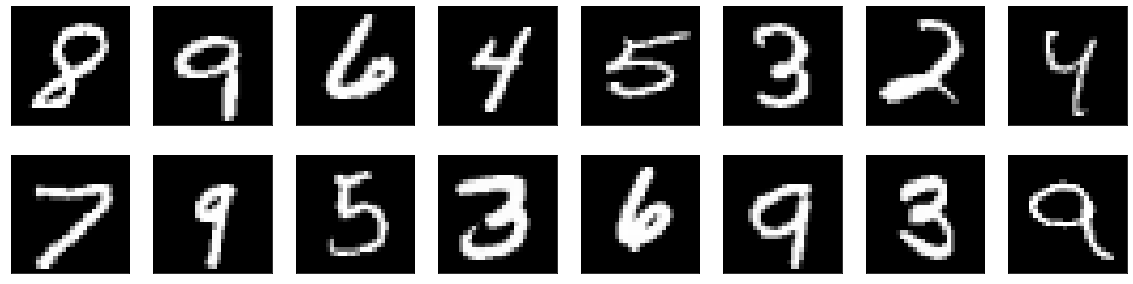

In [58]:
(xtr, ytr), (xte, yte) = mnist.load_data()

print('Data Shapes')
print('Training data - xtr:{}, ytr:{}'.format(xtr.shape, ytr.shape))
print('Testing data - xte:{}, yte:{}\n'.format(xte.shape, yte.shape))

# Visualize random samples

f = plt.figure(figsize=(20,5))

for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(xtr[np.random.randint(0,60000)], cmap='gray')
    plt.xticks([])
    plt.yticks([])

### Data Preparation

Input features are images of size 28 x 28. For ANN the data should be reshaped into one dimensional vectors. Each pixel in the input image is represented using grayscale values ranging from 0 to 255.

Output labels indicate the digit value ranging from 0 to 9. However, for neural networks classification the data needs to be one-hot encoded

---
### Problem I

1.   What is the correct range of the input values for normalization? Implement normalization code in the cell below. 

```
Hint: refer to sklearn.preprocessing - StandardScaler, MinMaxScaler.
```

2.   Why ANN requires output to be one-hot encoded? Implement code to convert output y to one-hot encoding.

```
Hint: refer to tensorflow.keras.utils.to_categorical
```
---

In [0]:
# Code for input data normalization and output one-hot encoding
# You may directly use available helper functions from sklearn and keras or implement your own function

xtr = xtr.reshape(-1, 784)
xte = xte.reshape(-1, 784)
scaler = MinMaxScaler()
xtr_norm = scaler.fit_transform(xtr)
xte_norm = scaler.transform(xte)

ytr_cat = to_categorical(ytr,num_classes=10)
yte_cat = to_categorical(yte,num_classes=10)


# xtr_norm = 
# xte_norm = 
# ytr_cat = 
# yte_cat = 

### Define Model

Below we define a baseline ANN-based model. Dense layers are fully connected layers in Keras used to define a standard MLP. Notice that the output layer contains 10 neurons which is equivalent to the number of classes. Output uses 'softmax' activation as this is a classification problem.


Number of layers, neurons and activations for hidden layers can be customized

The function returns a Keras model that can be used to train, predict, and evaluate using in-built functions.

In [0]:
def get_model(input_shape):
  input_data = Input(shape=input_shape)

  d1 = Dense(8, activation='tanh')(input_data)
  d2 = Dense(16, activation='tanh')(d1)
  # dr2 = Dropout(0.5)(d2)
  d3 = Dense(10, activation='softmax')(d2)

  model = Model(inputs=[input_data], outputs=[d3])

  return model

---
### Problem II

1.   Compile and train an ANN-model using in-built functions in Keras.

```
# Use compile to set following parameters:
#  - optimizer = adam, sgd, rmsprop
#  - loss = categorical_crossentropy

compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    sample_weight_mode=None, weighted_metrics=None, **kwargs
    )

# Use fit to train the model. Configure following parameters:
#  - x,y: input data and label
#  - batch_size: minibatch size, for example, 32, 64, 100, 256
#  - epochs: between 10-100
#  - validation_split: percentage of training data for validation (eg. 0.2)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)
```
[Compile API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

[Fit API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)


2.   Predict output for test data using trained model and evaluate model performance.



```
# Use predict function. Most parameters can be left as default. Pass normalized input features for output prediction

predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, 
    workers=1, use_multiprocessing=False
)

```

[Predict API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

The output from the model is one-hot encoded. How would you convert the prediction back to digit values?

For example:

```
# Categorical to label is obtained by identifying index of max value in each row. HINT: numpy.argmax().

yte_pred_cat = [[0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0,0,0]]
yte_pred = [3,6]
```
---

In [61]:
# Code for model training here

model = get_model(xtr_norm.shape[1:])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(
    x=xtr_norm, y=ytr_cat, batch_size=32, epochs=20, verbose=1,
    validation_split=0.2)







Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_51 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6254 - val_loss: 0.3266
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3137 - val_loss: 0.2787
Epoch 3/20
1500/1500 [============================

In [62]:
# Code for prediction here

yte_pred_cat = model.predict(xte_norm)
yte_pred = np.argmax(yte_pred_cat,axis=1)
accuracy = skacc(yte, yte_pred)
print("Baseline model accuracy: ", accuracy)

Baseline model accuracy:  0.9353


---
### Problem III

The baseline model is expected to have a test accuracy of around 93%. Can you propose at least 3 methods to improve the model to achieve better performance? Implement the 3 variants and present your results in the cell below.

Explain why the model performs better/ worse than baseline.

```
Hint: Following are some of the model configurations that can be modified:
```

1.   Batch size, number of epochs, validation split, optimizer, learning rate
2.   Model depth, dropout layers, activations, regularizations
3.   Advanced: Model callbacks to control early stopping, learning rate decay, model checkpoints

---

### Solution here

| Model         | Parameters Tuned                            | Accuracy  |
| ------------- |---------------------------------------------| ---------:|
| Baseline      | Batch Size and epochs                       | 0.939     |
| Aplha         | Change Model Architecture                   | 0.936     |
| Beta          | Regularization and Optimizer          | 0.90     |

```
# Please remove the examples and update with your own model variants.
```

### Method one : Change the batch_size= 64 and epochs = 80


In [63]:
### Modified model scripts and parameter details here
### You may also use model.summary() to show the model architecture 
### for each variants
# Code for model training here



model = get_model(xtr_norm.shape[1:])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',)
hist=model.fit(
    x=xtr_norm, y=ytr_cat, batch_size=64, epochs=80, verbose=1,
    validation_split=0.2)




yte_pred_cat = model.predict(xte_norm)
yte_pred = np.argmax(yte_pred_cat,axis=1)
accuracy = skacc(yte, yte_pred)
print("Baseline model accuracy: ", accuracy)




Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_54 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
750/750 [==============================] - 2s 2ms/step - loss: 0.8250 - val_loss: 0.4293
Epoch 2/80
750/750 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.3413
Epoch 3/80
750/750 [==============================] - 

### Method two : Change the model architecture by adding two more dense layers




In [0]:
def method_two(input_shape):
  input_data = Input(shape=input_shape)

  d1 = Dense(8, activation='tanh')(input_data)
  # dr1 = Dropout(0.2)(d1)
  d2 = Dense(16, activation='tanh')(d1)
  # dr2 = Dropout(0.5)(d2)
  d3 = Dense(16,activation='tanh')(d2)
  # dr3 = Dropout(0.5)(d3)
  d4 = Dense(16,activation='tanh')(d3)
  d5 = Dense(10, activation='softmax')(d4)

  model = Model(inputs=[input_data], outputs=[d5])

  return model

In [66]:
model = method_two(xtr_norm.shape[1:])
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',)
hist=model.fit(
    x=xtr_norm, y=ytr_cat, batch_size=128, epochs=80, verbose=1,
    validation_split=0.2)


yte_pred_cat = model.predict(xte_norm)
yte_pred = np.argmax(yte_pred_cat,axis=1)
accuracy = skacc(yte, yte_pred)
print("Baseline model accuracy: ", accuracy)



Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_57 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_58 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_59 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                170       
Total params: 7,138
Trainable params: 7,138
Non-trainable params: 0
________________________________________________________

### Method three : Change the model architecture by adding the regularizer and change the optimizer to 'SGD'


In [67]:
def method_three(input_shape):
  input_data = Input(shape=input_shape)

  d1 = Dense(8, activation='tanh')(input_data)
  # dr1 = Dropout(0.2)(d1)
  d2 = Dense(16, activation='tanh',kernel_regularizer=tf.keras.regularizers.l1(0.02),
                              activity_regularizer=tf.keras.regularizers.l2(0.02))(d1)
  # dr2 = Dropout(0.5)(d2)
  d3 = Dense(16,activation='tanh',kernel_regularizer=tf.keras.regularizers.l1(0.02),
                              activity_regularizer=tf.keras.regularizers.l2(0.02))(d2)
  # dr3 = Dropout(0.5)(d3)
  d4 = Dense(16,activation='tanh',kernel_regularizer=tf.keras.regularizers.l1(0.02),
                              activity_regularizer=tf.keras.regularizers.l2(0.02))(d3)
  d5 = Dense(10, activation='softmax')(d4)

  model = Model(inputs=[input_data], outputs=[d5])

  return model

model = method_three(xtr_norm.shape[1:])
model.summary()
model.compile(optimizer='sgd', loss='categorical_crossentropy',)
history=model.fit(
    x=xtr_norm, y=ytr_cat, batch_size=128, epochs=80, verbose=1,
    validation_split=0.2)


yte_pred_cat = model.predict(xte_norm)
yte_pred = np.argmax(yte_pred_cat,axis=1)
accuracy = skacc(yte, yte_pred)
print("Baseline model accuracy: ", accuracy)






Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_64 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                170       
Total params: 7,138
Trainable params: 7,138
Non-trainable params: 0
________________________________________________________

---
### Problem IV

Accuracy score is the standard metric for evaluating model performance in classification problems. 

*   Can you propose other measures to evaluate model performance? Compute scores for your models using the proposed metric.
*   What are the benefits of using the proposed metric?

```
HINT: Several popular metrics can be found in the sklearn.metrics library
```
---

## Answer

Precision is the ratio of True Positive / (True Positive + False Positive)

Recall is the ratio of True Positive / (True Positive + False Negative)

f1_score = 2* Precision * Recall / (Precision + recall)

In the example of lets say COVID-19 case detection. In this case, we would tolerate false positive(wrongly classified as patients). However, we would not tolerate false negative(as it may spread to more people).
In this case, we need to focus or maximize our recall score even though the other scores may fall.

However, a single score would not evaluate the performance entirely.
In the case of unbalanced dataset where a single or a few labels have occupy large percentage of the dataset.

For instance, a binary class classification problem. 99% of the data is from postive class and only 1% is from the negative class.
In this case, if the model simply (dumbly) classify all data as positive class, the recall score itself can show 100% which seems to be perfect. However, it is not the case.
In this example, other metrics should come in such as f1-score.

Using the F1 score we can get a more realistic measure of our classifier's performance. Moreover we can avoid to be fooled by the arithmetic mean between a very poor PRECISION and very high RECALL, which can be obtained simply by classifying all of the documents as positive using a dummy classifier.




Other methods like precision score, recall score, f1-score, macro-average and micro-average

In [50]:
### Problem IV codes here. Add more cells as needed
from sklearn.metrics import precision_score,recall_score,f1_score
accuracy = precision_score(yte, yte_pred,average='macro')
print("Precision accuracy: ", accuracy)

accuracy = recall_score(yte, yte_pred,average='micro')
print("Recall accuracy: ", accuracy)

accuracy = f1_score(yte, yte_pred,average='weighted')
print("f1_score accuracy: ", accuracy)






Precision accuracy:  0.9245930027478039
Recall accuracy:  0.9255
f1_score accuracy:  0.9253510044019032


---
### Bonus

Data visualization at various stage help develop intuition of model performance, identify cause for errors, and impelement ideas for improvement.

*   Can you write scripts to visualize different aspects of the model?

```
HINT: You can visualize model loss over epochs using the keras model history returned by model.fit(). 
      Confusion matrix is a good way of identifying the most challenging classes.
```
---

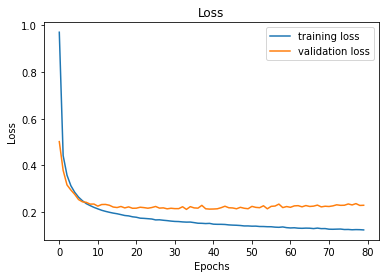

In [68]:
### Bonus codes here. Add more cells as needed
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()





In [69]:
labels = [x for x in range(0,10)]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[[ 944    0    6    1   11    8    2    5    3    0]
 [   0 1085    4    2    0    1    2    1   35    5]
 [  19    0  902   14    6   37   20    2   29    3]
 [   0    7   29  880    0   66    1   12   12    3]
 [   1    2    4    0  898    0   21    1    4   51]
 [  17    0   33   60    8  663   10   25   68    8]
 [  27    1   28    0   26    3  858    0   15    0]
 [   5    6   10   17    3   21    0  930    1   35]
 [   3   19    8   11    1   64   20    5  828   15]
 [   5   12    0    3   35   20    0   31    9  894]]


Text(0, 0.5, 'True')

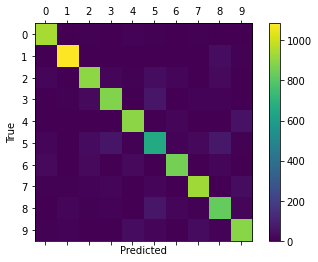

In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yte,yte_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
print(cm)
colorbar =ax.matshow(cm)
fig.colorbar(colorbar)
plt.xticks(labels,labels)
plt.yticks(labels,labels)
plt.xlabel("Predicted")
plt.ylabel("True")

### Have a Feedback?

If you have suggestions to improve this notebook, please share your ideas via email to the GA. We are always listening!

Thank you.

---

End of the Notebook

---